In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
ecommerceCustomers_df = pd.read_csv('/content/Ecommerce Customers.cvs')
ecommerceCustomers_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Changing columns names to have underscore: avg_session_length**

In [30]:
# change column avg.session lenth to avg_session_lenth
ecommerceCustomers_df.rename(columns={'Avg. Session Length':'avg_session_length'},inplace=True)

In [31]:
# change Time on App column to Time_on_App_length
ecommerceCustomers_df.rename(columns={'Time on App':'Time_on_App_length'},inplace=True)

In [32]:
# change time on webstite column to Time_on_Website_Length
ecommerceCustomers_df.rename(columns={'Time on Website':'Time_on_Website_Length'},inplace=True)

In [33]:
# change Length Of Membership to Length_of_Membership
ecommerceCustomers_df.rename(columns={'Length of Membership':'Length_of_Membership'},inplace=True)

In [34]:
# change Yearly Amount Spent to Yearly_Amount_Spent
ecommerceCustomers_df.rename(columns={'Yearly Amount Spent':'Yearly_Amount_Spent'},inplace=True)

In [35]:
ecommerceCustomers_df.head()

,Email,Address,Avatar,avg_session_length,Time_on_App_length,Time_on_Website_Length,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [36]:
# look at columns type, nulls and how big the dateset is

ecommerceCustomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Email                   500 non-null    object 
 1   Address                 500 non-null    object 
 2   Avatar                  500 non-null    object 
 3   avg_session_length      500 non-null    float64
 4   Time_on_App_length      500 non-null    float64
 5   Time_on_Website_Length  500 non-null    float64
 6   Length_of_Membership    500 non-null    float64
 7   Yearly_Amount_Spent     500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Notes**

There is no nulls

All columns are right datetype


#### Stats: univariate analysis , bivariate analysis, and multivariate analysis

**univariate analysis**

In [37]:
# Look at numerical stats

ecommerceCustomers_df.describe()

,avg_session_length,Time_on_App_length,Time_on_Website_Length,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Insights**

The means and medians of all numerical columns are relatively close, indicating not much variance. There are likely not many outliers in the dataset

In [38]:
# look at stats for objs

ecommerceCustomers_df.describe(include='object')

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


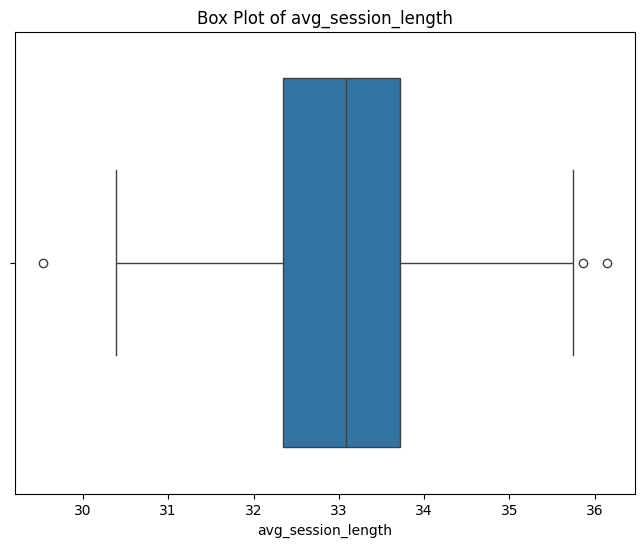

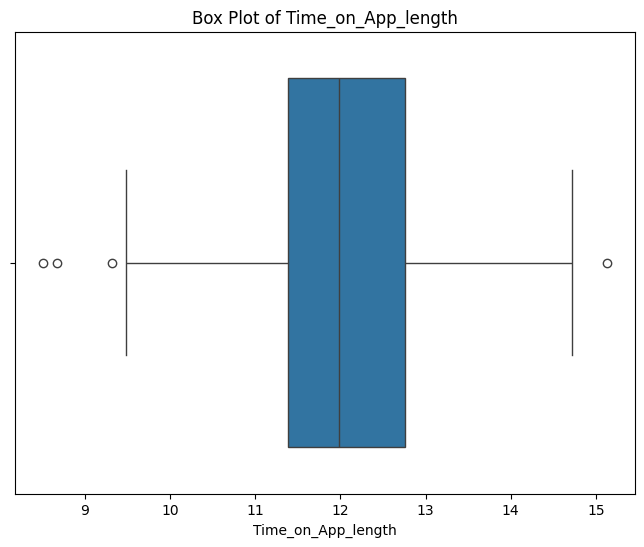

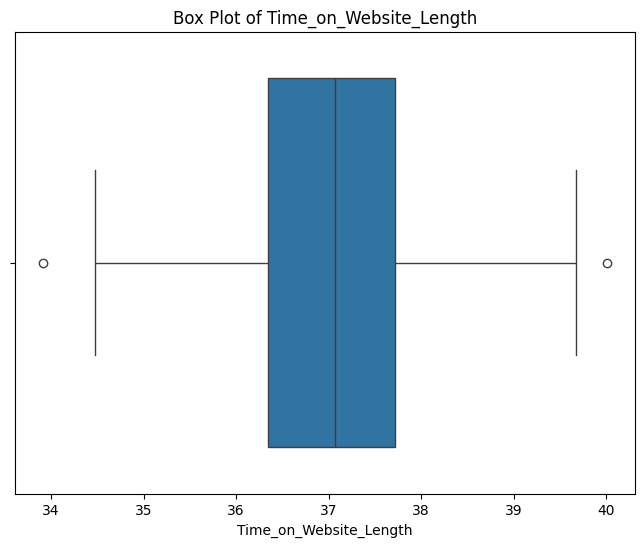

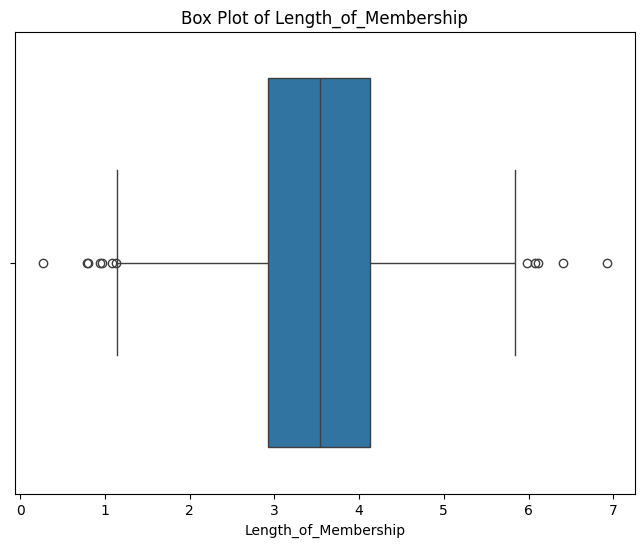

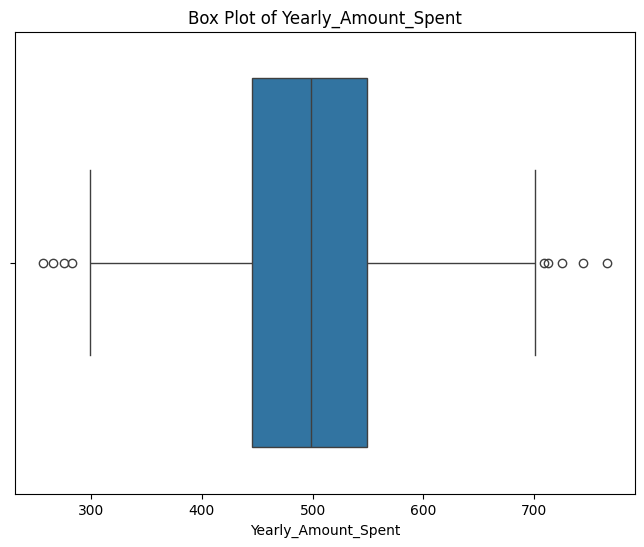

In [39]:
#  box plot chart for each numerical variable

numerical_features = ecommerceCustomers_df.select_dtypes(include=np.number).columns

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=ecommerceCustomers_df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

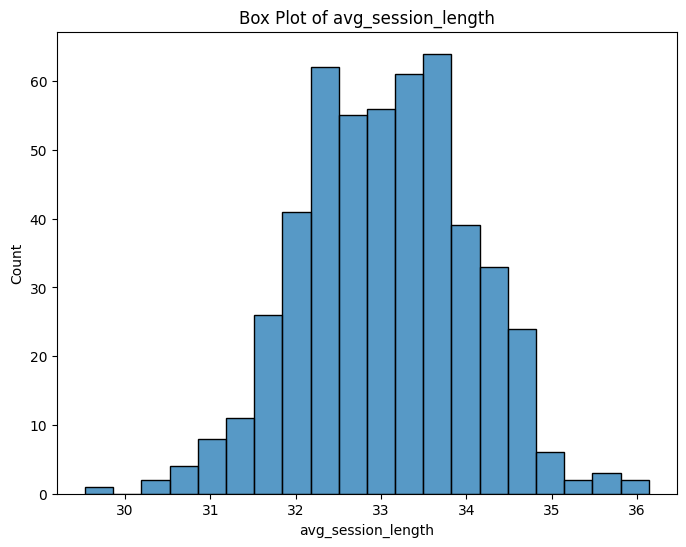

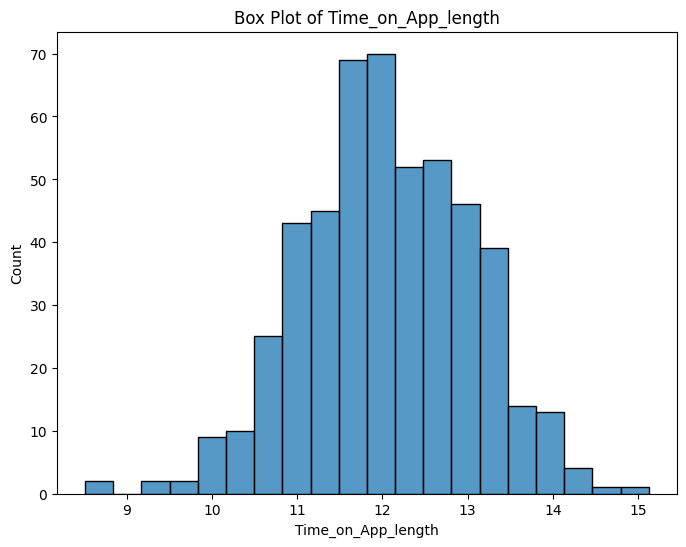

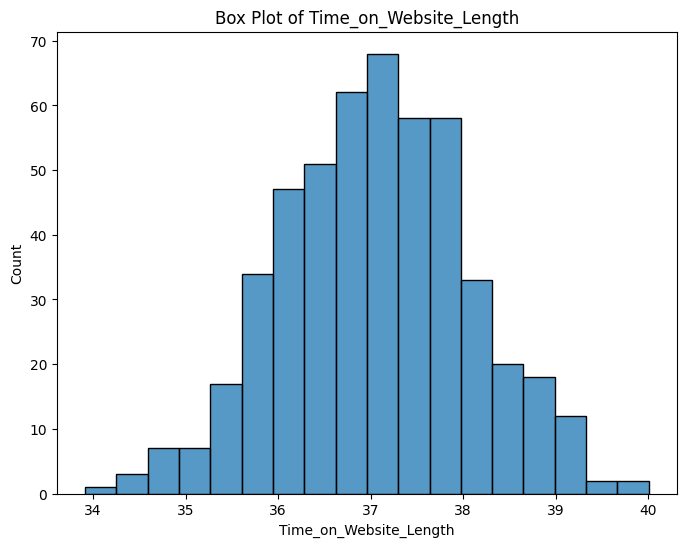

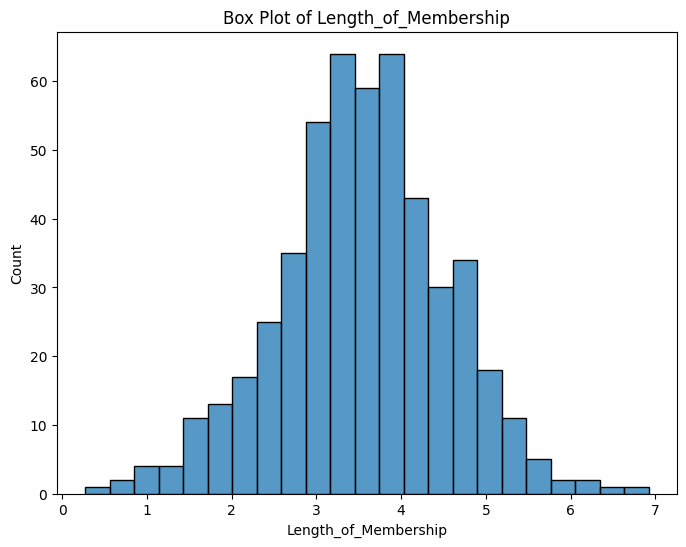

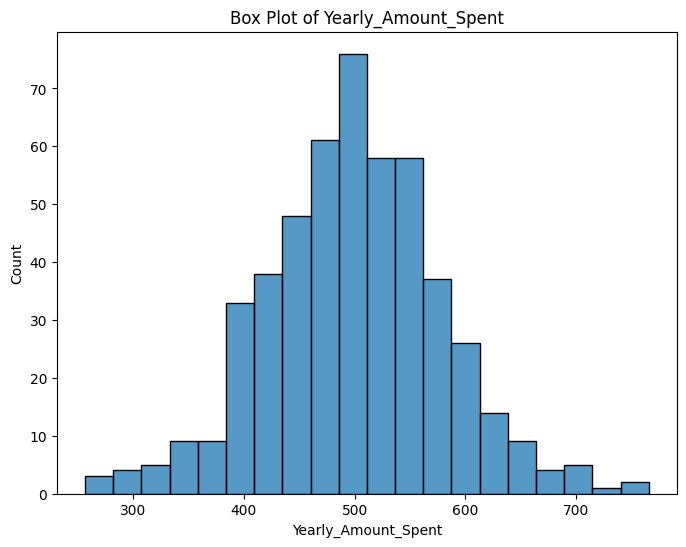

In [40]:
# hist chart
numerical_features = ecommerceCustomers_df.select_dtypes(include=np.number).columns

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(x=ecommerceCustomers_df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

In [42]:
ecommerceCustomers_df['Address'].head()

,Address
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605"
1,"4547 Archer Common\nDiazchester, CA 06566-8576"
2,"24645 Valerie Unions Suite 582\nCobbborough, D..."
3,"1414 David Throughway\nPort Jason, OH 22070-1220"
4,"14023 Rodriguez Passage\nPort Jacobville, PR 3..."


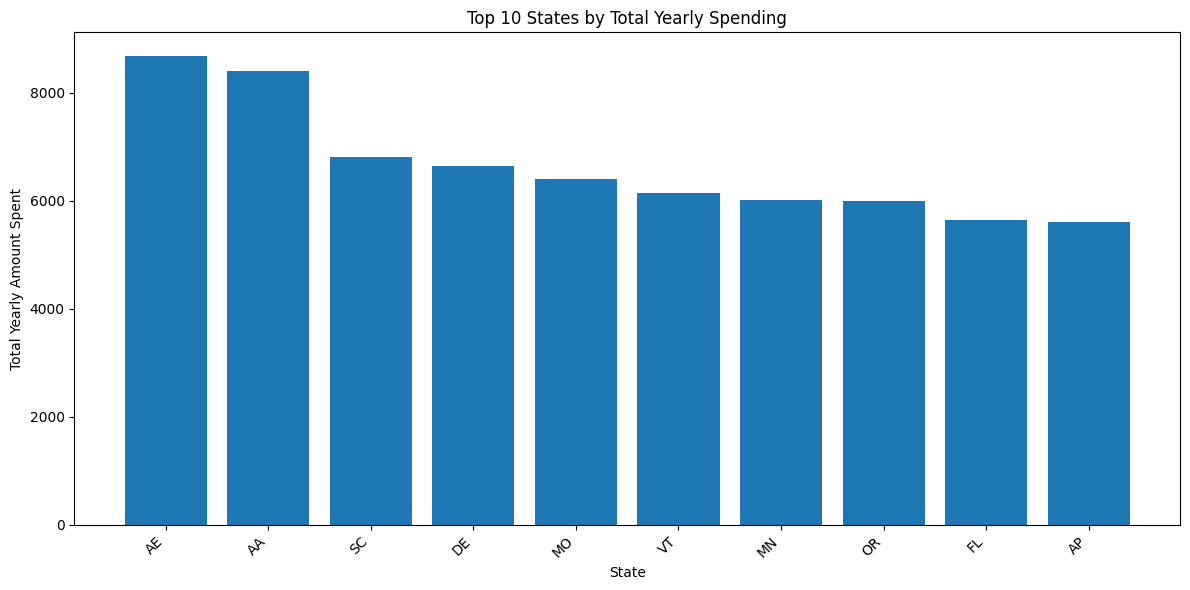

In [53]:


# Group by state and calculate total yearly spending
state_spending = ecommerceCustomers_df.groupby('State')['Yearly_Amount_Spent'].sum()

# Sort by spending in descending order and get the top 10
top_10_states = state_spending.sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel('State')
plt.ylabel('Total Yearly Amount Spent')
plt.title('Top 10 States by Total Yearly Spending')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

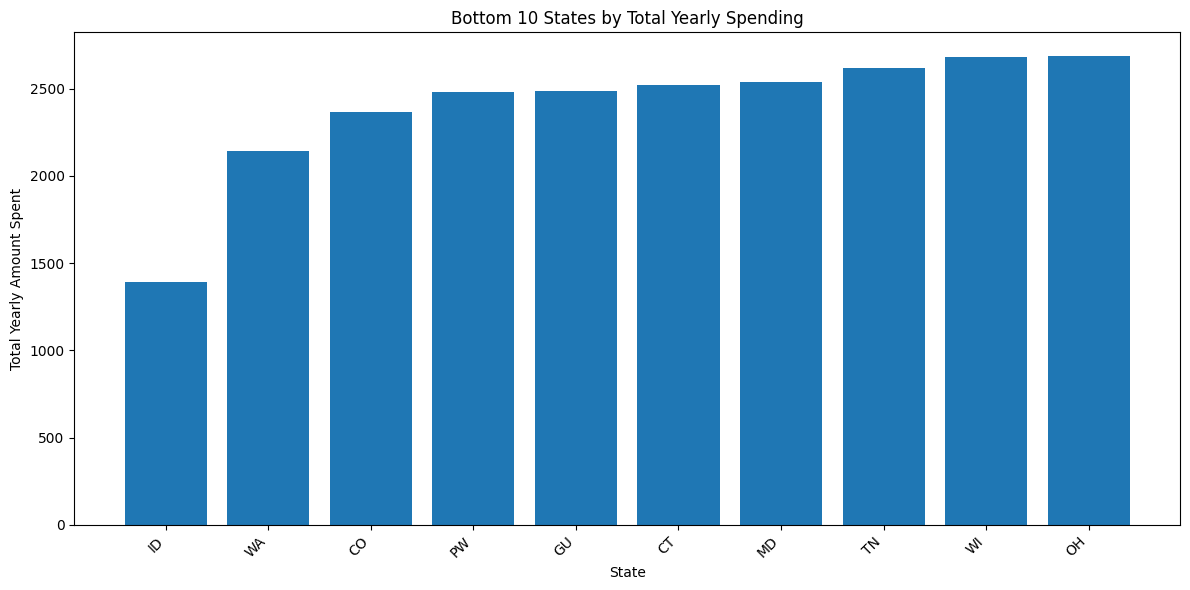

In [54]:

# Group by state and calculate total yearly spending
state_spending = ecommerceCustomers_df.groupby('State')['Yearly_Amount_Spent'].sum()

# Sort by spending in ascending order and get the bottom 10
bottom_10_states = state_spending.sort_values(ascending=True).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_states.index, bottom_10_states.values)
plt.xlabel('State')
plt.ylabel('Total Yearly Amount Spent')
plt.title('Bottom 10 States by Total Yearly Spending')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

**Bivariate analysis**

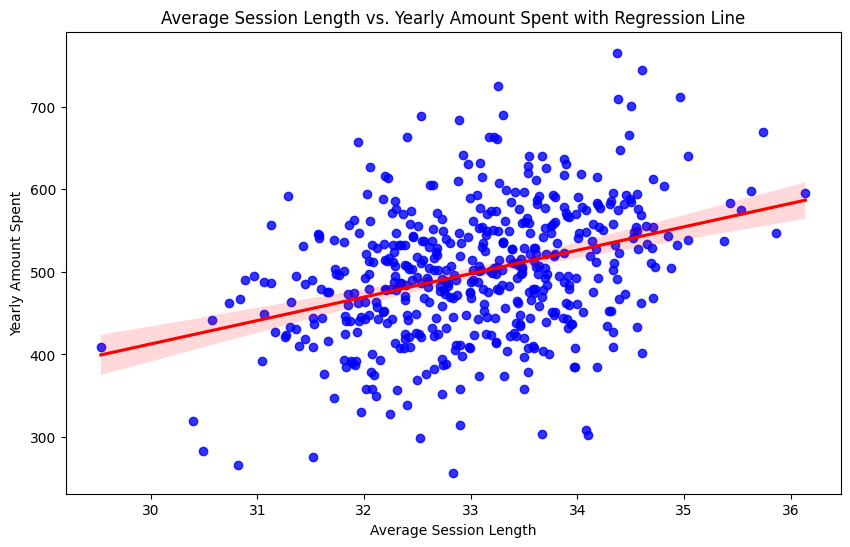

In [71]:

# Create the regplot with different colors for the data points and the line
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_session_length', y='Yearly_Amount_Spent', data=ecommerceCustomers_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Average Session Length')
plt.ylabel('Yearly Amount Spent')
plt.title('Average Session Length vs. Yearly Amount Spent with Regression Line')
plt.show()

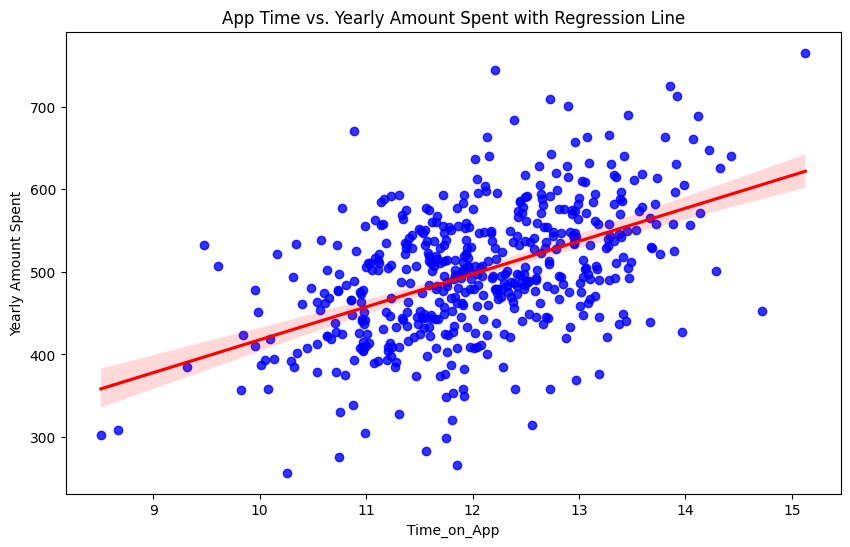

In [77]:

# Create the regplot with different colors for the data points and the line
plt.figure(figsize=(10, 6))
sns.regplot(x='Time_on_App_length', y='Yearly_Amount_Spent', data=ecommerceCustomers_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Time_on_App')
plt.ylabel('Yearly Amount Spent')
plt.title('App Time vs. Yearly Amount Spent with Regression Line')
plt.show()

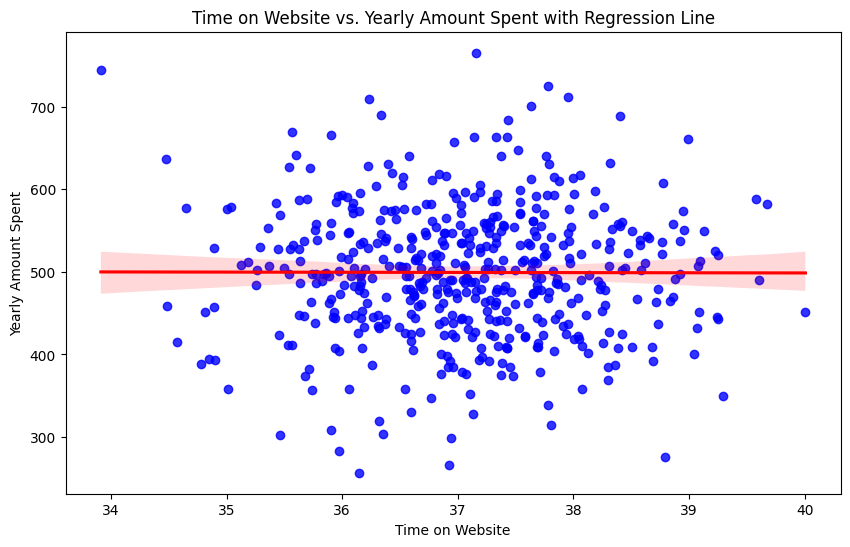

In [84]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Time_on_Website_Length', y='Yearly_Amount_Spent', data=ecommerceCustomers_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.title('Time on Website vs. Yearly Amount Spent with Regression Line')
plt.show()

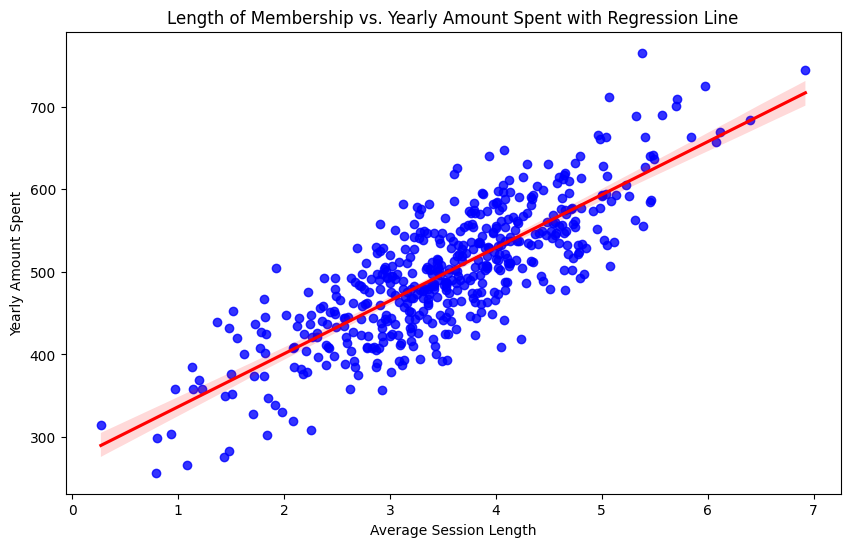

In [72]:
#  regplot with different colors for the data points and the line
plt.figure(figsize=(10, 6))
sns.regplot(x='Length_of_Membership', y='Yearly_Amount_Spent', data=ecommerceCustomers_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Average Session Length')
plt.ylabel('Yearly Amount Spent')
plt.title('Length of Membership vs. Yearly Amount Spent with Regression Line')
plt.show()

**Highlights**

There is a strong positive correlation between Length of Membership and Yearly Amount Spent. This suggests that customers who have been members for a longer time tend to spend more annually.

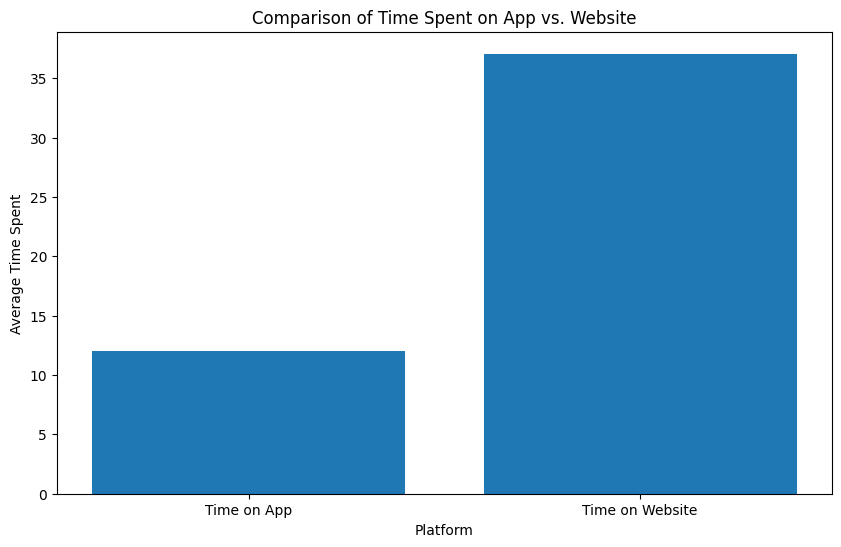

In [90]:

#  bar chart comparing Time on App and Time on Website spending
plt.figure(figsize=(10, 6))
plt.bar(['Time on App', 'Time on Website'], [ecommerceCustomers_df['Time_on_App_length'].mean(), ecommerceCustomers_df['Time_on_Website_Length'].mean()])
plt.xlabel('Platform')
plt.ylabel('Average Time Spent')
plt.title('Comparison of Time Spent on App vs. Website')
plt.show()

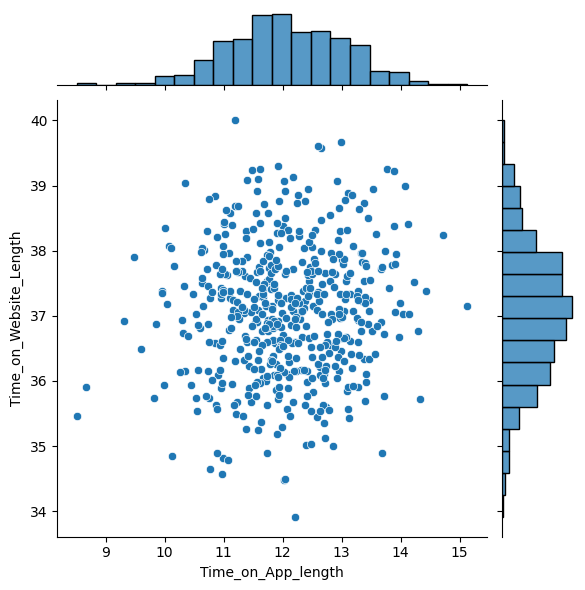

In [98]:
sns.jointplot(x='Time_on_App_length', y='Time_on_Website_Length', data=ecommerceCustomers_df)

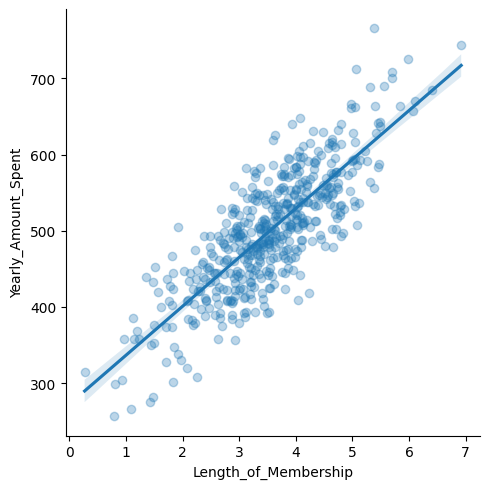

In [103]:
sns.lmplot(x="Length_of_Membership",
           y="Yearly_Amount_Spent",
           data=ecommerceCustomers_df,
           scatter_kws={'alpha':0.3})



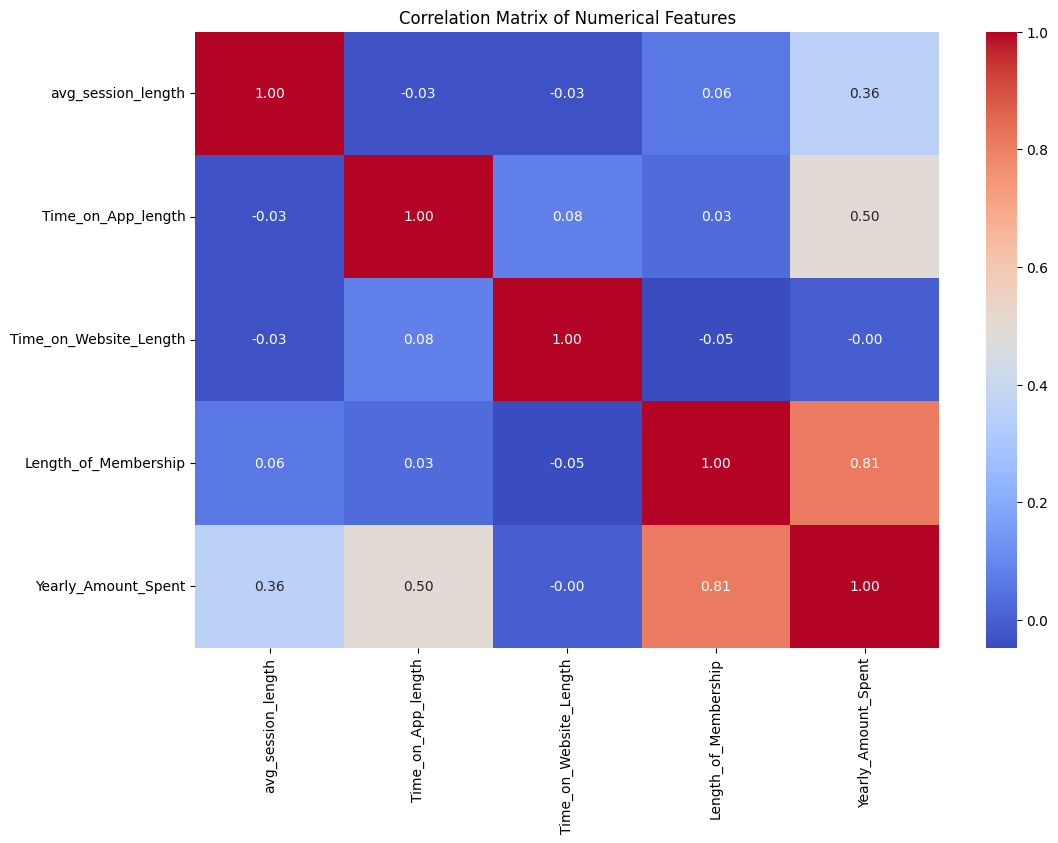

In [108]:


# Correlation Matrix Heatmap
numerical_features = ecommerceCustomers_df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [112]:
# picking the top features
X = ecommerceCustomers_df[['Time_on_App_length', 'Length_of_Membership', 'avg_session_length', 'State']]
y = ecommerceCustomers_df['Yearly_Amount_Spent']


In [113]:



# Create dummy variables for the 'State' column
X = pd.get_dummies(X, columns=['State'], prefix=['State'])




MAE: 8.122332255054797
MSE: 103.06883208712951
RMSE: 10.152282112270596


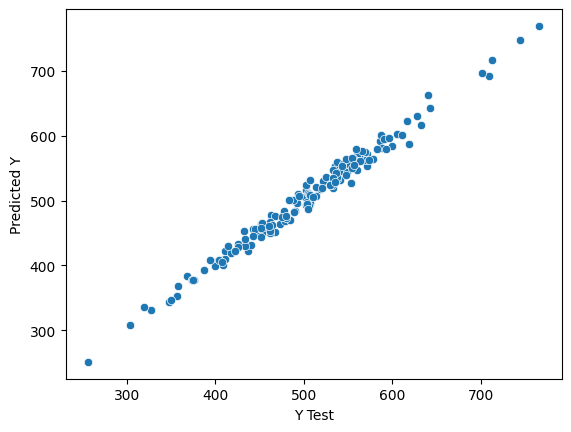

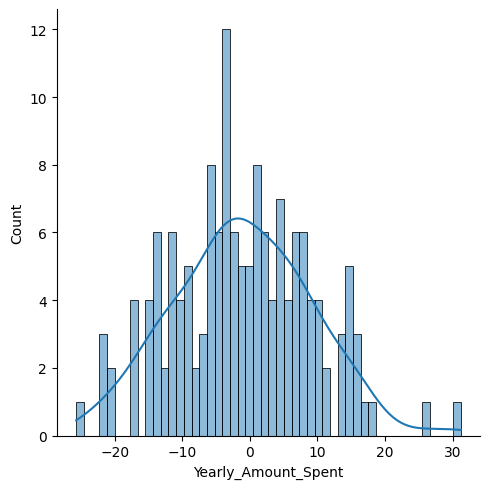

,Coefficient
Time_on_App_length,3.842449e+01
Length_of_Membership,6.145084e+01
avg_session_length,2.564319e+01
State_AA,-4.640399e+13
State_AE,-4.640399e+13
...,...
State_VT,-4.640399e+13
State_WA,-4.640399e+13
State_WI,-4.640399e+13
State_WV,-4.640399e+13


In [134]:
# prompt: train the model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Create a Linear Regression model
lm = LinearRegression()

# Train the model on the training data
lm.fit(X_train, y_train)

# Make predictions on the testing data
predictions = lm.predict(X_test)

# Evaluate the model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Plot the residuals
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Residual Histogram
sns.displot((y_test - predictions), bins=50, kde=True)
plt.show()

# Coefficients of the model
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [132]:


# Calculate the baseline prediction using the mean of the target variable
baseline_prediction = y_train.mean()

# Evaluate the baseline prediction using Mean Absolute Error (MAE)
baseline_mae = metrics.mean_absolute_error(y_test, [baseline_prediction] * len(y_test))

print("Baseline MAE:", baseline_mae)

Baseline MAE: 66.63418052230475


In [133]:
# prompt: get the r square

# Calculate R-squared
r_squared = lm.score(X_test, y_test)
print('R-squared:', r_squared)

R-squared: 0.9858008124015403


In [117]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
print(cdf)

                             Coeff
Time_on_App_length    3.842449e+01
Length_of_Membership  6.145084e+01
avg_session_length    2.564319e+01
State_AA             -4.640399e+13
State_AE             -4.640399e+13
...                            ...
State_VT             -4.640399e+13
State_WA             -4.640399e+13
State_WI             -4.640399e+13
State_WV             -4.640399e+13
State_WY             -4.640399e+13

[65 rows x 1 columns]


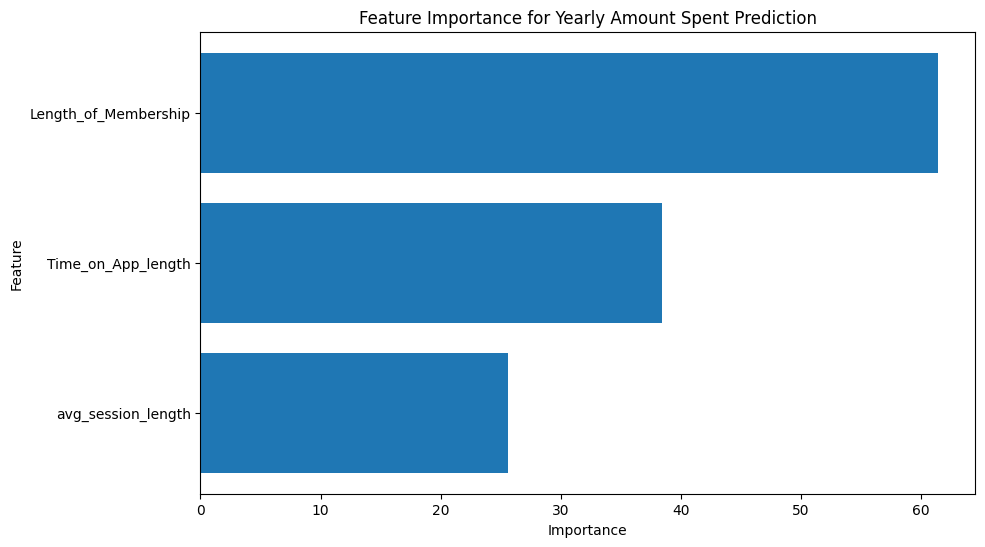

In [120]:
# fature impatance chart to include only avg session lenght, tme on app, lengh of membership

# Assuming you have your trained linear regression model 'lm' and feature names 'X.columns'
feature_importances = lm.coef_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Select only the desired features
selected_features = ['avg_session_length', 'Time_on_App_length', 'Length_of_Membership']
feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Yearly Amount Spent Prediction')
plt.show()

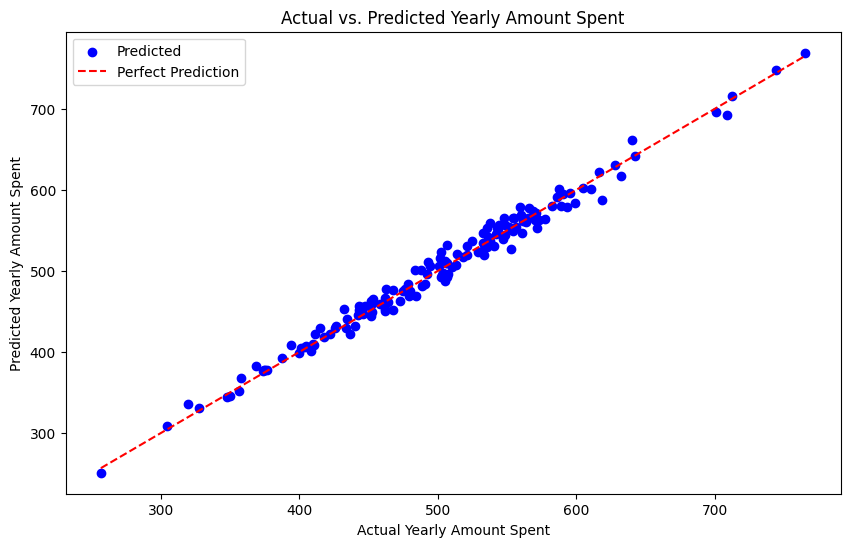

In [128]:




# You can also visualize the results (e.g., scatter plot of actual vs. predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, label='Predicted', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs. Predicted Yearly Amount Spent')
plt.legend()
plt.show()

In [129]:
# residuals. the actualy values minus predictions
residuals = y_test - predictions


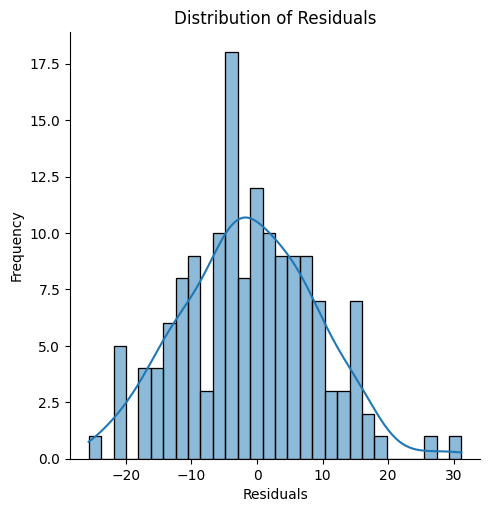

In [130]:
sns.displot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**NOtes**

residual plot indicates that the model performs well, with no significant bias in its predictions. The residuals' distribution supports the model’s validity and suggests that it provides reliable predictions for Yearly Amount Spent

### Summary

**Highlishts**

Based on the regression model results provided:

Model Performance Metrics:

Mean Absolute Error (MAE): 8.12 – On average, the model’s predictions are off by about 8.12 units from the actual Yearly Amount Spent.

Mean Squared Error (MSE): 103.07 – The average of the squared errors, with larger errors having a greater impact due to squaring.

Root Mean Squared Error (RMSE): 10.15 – Predictions are off by about 10.15 units from actual values, with larger errors penalized more heavily.

Baseline Comparison:

Baseline MAE: 66.63 – The model significantly outperforms the baseline model (which likely predicts the mean or median), reducing the average error from 66.63 to 8.12, showing that it is effectively capturing the relationship in the data.
R-squared (R²):

R-squared: 0.9858 – The model explains 98.58% of the variance in Yearly Amount Spent, indicating a very strong fit and high predictive power.

Feature Insights:

Length of Membership:

Length of Membership had an 81% correlation with Yearly Amount Spent, making it a highly influential predictor. This suggests that customers who have been members for longer tend to spend more annually.

Time on App vs. Time on Website:

The average time spent on the app was lower compared to the time spent on the website. Despite this, Time on App had a 50% correlation with Yearly Amount Spent, indicating it’s a significant predictor of spending.

In contrast, Time on Website had close to zero correlation with Yearly Amount Spent, suggesting that website time may not be as influential on spending behavior as time on the app.



**Overall Interpretation**

The model performs exceptionally well, with low errors and a high R-squared, and provides valuable insights into customer behavior. The high correlation between Length of Membership and spending, along with the significant correlation of Time on App, highlights these features as key drivers of Yearly Amount Spent. Conversely, the minimal correlation for Time on Website suggests it has little impact on spending.

These insights can guide targeted strategies to increase spending by focusing on customer retention (extending membership length) and enhancing app engagement. Further validation on new data is recommended to confirm these finding